In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/drive/MyDrive/Data/train.csv", encoding='utf-8')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.shape

(404290, 6)

In [4]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


## Analysing Training Dataset

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

#### Distribution of duplicate and non-duplicate questions

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

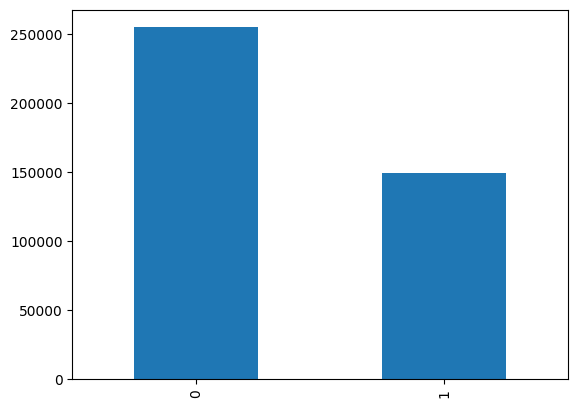

In [8]:


print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

#### Finding total number of unique and repeated questions

In [9]:

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


#### Frequency of Repeated Questions

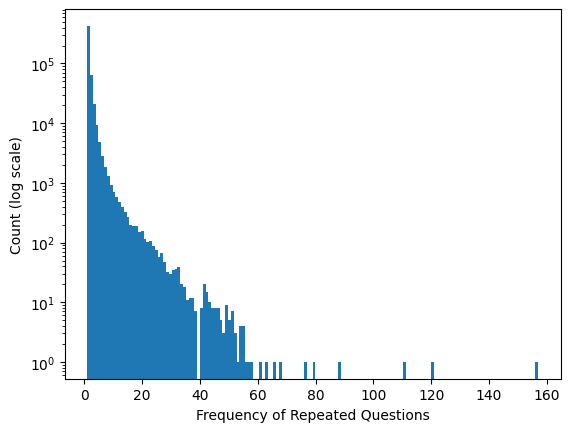

In [10]:
# Repeated questions histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.xlabel('Frequency of Repeated Questions')
plt.ylabel('Count (log scale)')
plt.show()


###  Feature Engineering

In [11]:
df['q2_len'] = df['question2'].str.len()

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,57.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,88.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,59.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,65.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,39.0


#### Finfing the total number of words in question1 and question2

In [13]:

df['q1_num_words'] = df['question1'].apply(lambda row: len(str(row).split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(str(row).split(" ")))
df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,57.0,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,88.0,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,59.0,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,65.0,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,39.0,13,7


#### This method is used to find the common words in both the questions

In [14]:
def common_words(row):
    if pd.isnull(row['question1']) or pd.isnull(row['question2']):
        return 0
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)


In [15]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,57.0,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,88.0,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,59.0,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,65.0,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,39.0,13,7,2


#### This method is used to find the Total words in both the questions

In [16]:
def total_words(row):
    if pd.isnull(row['question1']) or pd.isnull(row['question2']):
        return 0
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

df['word_total'] = df.apply(total_words, axis=1)

In [17]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,57.0,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,88.0,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,59.0,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,65.0,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,39.0,13,7,2,20,0.10


## Below are the graphs related to above methods

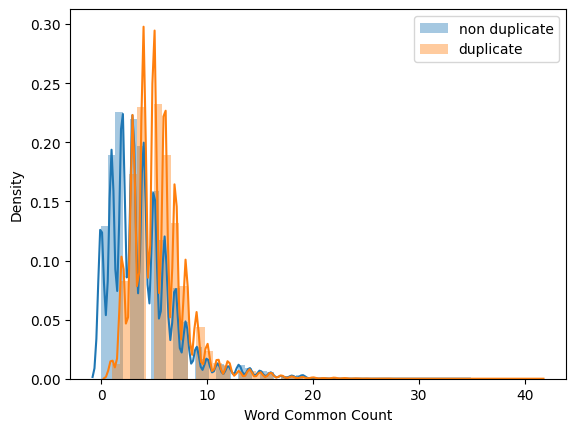

In [18]:

sns.distplot(df[df['is_duplicate'] == 0]['word_common'], label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'], label='duplicate')

plt.xlabel('Word Common Count')
plt.ylabel('Density')

plt.legend()

# Show the plot
plt.show()


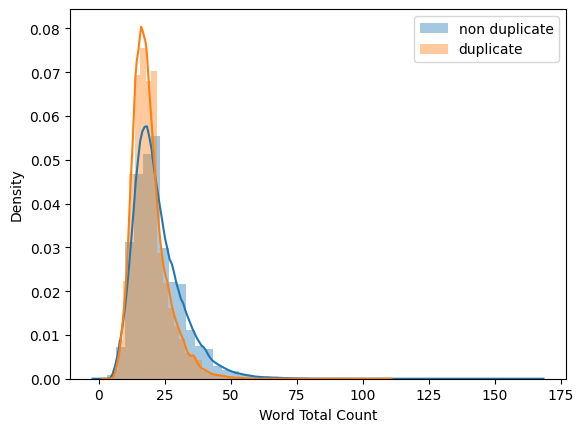

In [19]:

sns.distplot(df[df['is_duplicate'] == 0]['word_total'], label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'], label='duplicate')

plt.xlabel('Word Total Count')
plt.ylabel('Density')

plt.legend()
# Show the plot
plt.show()


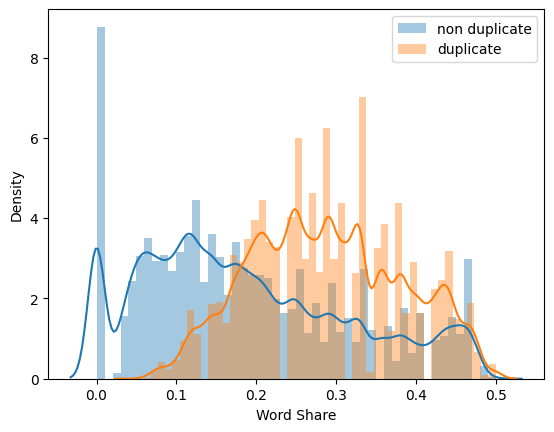

In [20]:
# Filter out NaN values before plotting
non_duplicate_word_share = df[df['is_duplicate'] == 0]['word_share'].dropna()
duplicate_word_share = df[df['is_duplicate'] == 1]['word_share'].dropna()

# Plot the distribution
sns.distplot(non_duplicate_word_share, label='non duplicate')
sns.distplot(duplicate_word_share, label='duplicate')

plt.xlabel('Word Share')
plt.ylabel('Density')

plt.legend()

plt.show()


In [21]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,57.0,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,88.0,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,59.0,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,65.0,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,39.0,13,7,2,20,0.10


## Processing actual data from Quora dataset

In [22]:

required_columns = ['question1', 'question2', 'is_duplicate']
Quora = df[required_columns]
Quora


,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,What is one coin?,What's this coin?,0
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Cleaning data by removing punctuation,whitespace,numbers,stopwords ...

In [23]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer

def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # lower text
        text = text.lower()
        # tokenize text using WhitespaceTokenizer
        tokenizer = WhitespaceTokenizer()
        tokens = tokenizer.tokenize(text)
        # remove punctuation
        tokens = [word.strip(string.punctuation) for word in tokens]
        # remove words that contain numbers
        tokens = [word for word in tokens if not any(c.isdigit() for c in word)]
        # remove stop words
        stop = stopwords.words('english')
        stop = [w for w in stop if w not in ['not', 'no']]
        tokens = [x for x in tokens if (x not in stop)]
        # remove empty tokens
        tokens = [t for t in tokens if len(t) > 0]
        # remove words with only one letter
        tokens = [t for t in tokens if len(t) > 1]
        # join all
        text = " ".join(tokens)
        return text
    else:
        # If the input is not a string, return an empty string or handle it as needed
        return ""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
Quora["question1_data"] = Quora["question1"].apply(lambda x: clean_text(x))
Quora["question2_data"] = Quora["question2"].apply(lambda x: clean_text(x))

In [25]:
Quora.drop(Quora.columns[[0, 1]], axis=1, inplace=True)

In [26]:
Quora.head()

,is_duplicate,question1_data,question2_data
0,0,step step guide invest share market india,step step guide invest share market
1,0,story kohinoor koh-i-noor diamond,would happen indian government stole kohinoor ...
2,0,increase speed internet connection using vpn,internet speed increased hacking dns
3,0,mentally lonely solve,find remainder divided
4,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water


### remove_contractions, replace_currency_symbols, remove_hyperlinks, remove_html_tags

In [27]:
import string
import re
from multiprocessing import Pool, cpu_count

def remove_contractions(text):
    contractions = {
        "don't": "do not",
        "won't": "will not",
        "can't": "cannot",
        "I'm": "I am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are"
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

def replace_currency_symbols(text):
    currency_symbols = {
        "$": "USD",
        "€": "EUR",
        "£": "GBP",
        "¥": "JPY",
        "₹": "INR",
        "₽": "RUB",  # Russian Ruble
        "₩": "KRW",  # South Korean Won
        "฿": "THB",  # Thai Baht
        "₴": "UAH",  # Ukrainian Hryvnia
        "₦": "NGN"
    }
    for symbol, currency_name in currency_symbols.items():
        text = text.replace(symbol, currency_name)
    return text

def remove_hyperlinks(text):
    text = re.sub(r'http\S+', '', text)
    return text

def remove_html_tags(text):
    text = re.sub(r'<.*?>', '', text)
    return text

def process_column(column):
    with Pool(cpu_count()) as pool:
        processed_column = pool.map(remove_contractions, column)
        processed_column = pool.map(replace_currency_symbols, processed_column)
        processed_column = pool.map(remove_hyperlinks, processed_column)
        processed_column = pool.map(remove_html_tags, processed_column)
    return processed_column


In [28]:
Quora['question1_data'] = process_column(Quora['question1_data'])
Quora['question2_data'] = process_column(Quora['question2_data'])

In [29]:
Quora.head()

,is_duplicate,question1_data,question2_data
0,0,step step guide invest share market india,step step guide invest share market
1,0,story kohinoor koh-i-noor diamond,would happen indian government stole kohinoor ...
2,0,increase speed internet connection using vpn,internet speed increased hacking dns
3,0,mentally lonely solve,find remainder divided
4,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water


## Applying nlp concepts to convert text data into numerical data

In [30]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Combine all questions for training Word2Vec
all_questions = list(Quora['question1_data']) + list(Quora['question2_data'])
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=all_questions, vector_size=100, window=5, min_count=1, workers=4)


## Training the data into train and test

In [31]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector
def word2vec_vectorizer(data, model, num_features):
    if hasattr(model.wv, 'index_to_key'):
        vocabulary = set(model.wv.index_to_key)
    else:
        vocabulary = set(model.wv.index2word)

    features = [average_word_vectors(question, model, vocabulary, num_features) for question in data]
    return np.array(features)

# Vectorize questions
X = word2vec_vectorizer(Quora['question1_data'], word2vec_model, 100)
Y = word2vec_vectorizer(Quora['question2_data'], word2vec_model, 100)
features=np.hstack((X, Y))
labels=Quora['is_duplicate']

In [32]:
print("Vectorizing data X",X)

Vectorizing data X [[ 0.22560713  0.32502179 -0.02803988 ... -0.19613373  0.19055542
  -0.17635124]
 [ 0.16817777  0.23091618  0.04495402 ... -0.23079377  0.13712243
  -0.21380465]
 [ 0.22681373  0.32891811 -0.03921262 ... -0.18681507  0.22669766
  -0.11297099]
 ...
 [ 0.28174647  0.26994656  0.04555481 ... -0.22216995  0.1800034
  -0.10070259]
 [ 0.23694526  0.28099332 -0.04428751 ... -0.184428    0.20072742
  -0.16821643]
 [ 0.29607153  0.38105129 -0.06242954 ... -0.19255908  0.2178838
  -0.1715577 ]]


In [33]:
print("Vectorizing data Y",Y)

Vectorizing data Y [[ 0.19455017  0.33969575 -0.04046475 ... -0.19186648  0.20476778
  -0.18605424]
 [ 0.15704131  0.27530233  0.01428822 ... -0.20243841  0.15489152
  -0.20057929]
 [ 0.21214438  0.34107452 -0.04463648 ... -0.18947866  0.16397035
  -0.14537013]
 ...
 [ 0.2287837   0.19773758 -0.12563304 ... -0.23593432  0.12962447
  -0.26771324]
 [ 0.19831685  0.30005907 -0.02401052 ... -0.14407332  0.14360739
  -0.14730805]
 [ 0.29607153  0.38105129 -0.06242954 ... -0.19255908  0.2178838
  -0.1715577 ]]


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)

# Plot the graph
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Word2Vec Embeddings with Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Is Duplicate')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features), labels, test_size=0.2, random_state=42)

## RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use accuracy as the scoring metric for grid search
scorer = make_scorer(accuracy_score)

# Perform Grid Search
grid_search = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, Y_train)

# Make predictions and evaluate
predictions = best_clf.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(Y_test, predictions))


In [ ]:
from sklearn.model_selection import cross_val_score

# Assuming clf is your RandomForestClassifier instance
cv_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


#### Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:\n", cm)


#### Precision, Recall, and F1-Score:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


#### Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


## SVC Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, Y_train, Y_test are properly defined
clf_svc = SVC(random_state=42)
clf_svc.fit(X_train, Y_train)

# Make predictions
predictions_svc = clf_svc.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(Y_test, predictions_svc)
print(f'Accuracy: {accuracy_svc}')
print(classification_report(Y_test, predictions_svc))


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, Y_train, Y_test are properly defined
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, Y_train)

# Make predictions
predictions_knn = clf_knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(Y_test, predictions_knn)
print(f'Accuracy: {accuracy_knn}')
print(classification_report(Y_test, predictions_knn))


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, Y_train, Y_test are properly defined
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X_train, Y_train)

# Make predictions
predictions_xgb = clfxgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(Y_test, predictions_xgb)
print(f'Accuracy: {accuracy_xgb}')
print(classification_report(Y_test, predictions_xgb))
